In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [5]:
file_path = 'C:\\Users\\lavie\\OneDrive\\Desktop\\Project_2\\healthcare-dataset-stroke-data.csv'

healthcare_stroke_df = pd.read_csv(file_path)
healthcare_stroke_df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Display basic information and the first few rows of the dataset
dataset_info = healthcare_stroke_df.info()
first_rows = healthcare_stroke_df.head()

dataset_info, first_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(None,
       id  gender   age  hypertension  heart_disease ever_married  \
 0   9046    Male  67.0             0              1          Yes   
 1  51676  Female  61.0             0              0          Yes   
 2  31112    Male  80.0             0              1          Yes   
 3  60182  Female  49.0             0              0          Yes   
 4   1665  Female  79.0             1              0          Yes   
 
        work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
 0        Private          Urban             228.69  36.6  formerly smoked   
 1  Self-employed          Rural             202.21   NaN     never smoked   
 2        Private          Rural             105.92  32.5     never smoked   
 3        Private          Urban             171.23  34.4           smokes   
 4  Self-employed          Rural             174.12  24.0     never smoked   
 
    stroke  
 0       1  
 1       1  
 2       1  
 3       1  
 4       1  )

In [18]:
if 'id' in healthcare_stroke_df.columns:
    healthcare_stroke_df.drop('id', axis=1, inplace=True)

healthcare_stroke_df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [19]:
healthcare_stroke_df.head()
healthcare_stroke_df['stroke'].value_counts()


stroke
0    4860
1     249
Name: count, dtype: int64

In [20]:
healthcare_stroke_df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [21]:
# Handling missing values in 'bmi' column by imputing with median
healthcare_stroke_df['bmi'].fillna(healthcare_stroke_df['bmi'].median(), inplace=True)
healthcare_stroke_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [23]:
healthcare_stroke_df['bmi'].isnull().sum()
healthcare_stroke_df['bmi'].median()

28.1

In [34]:
healthcare_stroke_df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [24]:
# Identifying categorical and numerical columns
categorical_cols = healthcare_stroke_df.select_dtypes(include=['object']).columns
numerical_cols = healthcare_stroke_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('stroke')  # exclude target variable from scaling
numerical_cols, categorical_cols



(Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object'),
 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'))

In [25]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

                                 


In [26]:
# Splitting the dataset into features and target variable
X = healthcare_stroke_df.drop('stroke', axis=1)
y = healthcare_stroke_df['stroke']

In [27]:
# Remove rows where 'gender' is 'Other'
healthcare_stroke_df = healthcare_stroke_df[healthcare_stroke_df['gender'] != 'Other']

# After removing, you can proceed with the split and preprocessing again
X = healthcare_stroke_df.drop('stroke', axis=1)
y = healthcare_stroke_df['stroke']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [28]:
# Checking the distribution of the 'gender' column
gender_distribution = healthcare_stroke_df['gender'].value_counts()
gender_distribution


gender
Female    2994
Male      2115
Name: count, dtype: int64

In [29]:
# Removing rows where 'gender' is 'Other'
healthcare_stroke_df = healthcare_stroke_df[healthcare_stroke_df['gender'] != 'Other']

# Splitting the dataset again into features and target variable
X = healthcare_stroke_df.drop('stroke', axis=1)
y = healthcare_stroke_df['stroke']

# Splitting the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data again
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Checking the shapes of the processed datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((4087, 20), (1022, 20), (4087,), (1022,))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Training the Random Forest model
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Training the Decision Tree model
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Training the Logistic Regression model
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Evaluating the models
rf_accuracy = accuracy_score(y_test, rf_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

rf_report = classification_report(y_test, rf_pred)
dt_report = classification_report(y_test, dt_pred)
lr_report = classification_report(y_test, lr_pred)

(rf_accuracy, dt_accuracy, lr_accuracy), (rf_report, dt_report, lr_report)


c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lavie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


((0.9393346379647749, 0.910958904109589, 0.9393346379647749),
 ('              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       960\n           1       0.50      0.02      0.03        62\n\n    accuracy                           0.94      1022\n   macro avg       0.72      0.51      0.50      1022\nweighted avg       0.91      0.94      0.91      1022\n',
  '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.95       960\n           1       0.22      0.18      0.19        62\n\n    accuracy                           0.91      1022\n   macro avg       0.58      0.57      0.57      1022\nweighted avg       0.90      0.91      0.91      1022\n',
  '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       960\n           1       0.00      0.00      0.00        62\n\n    accuracy                           0.94      1022\n   macro avg       0.47      0.

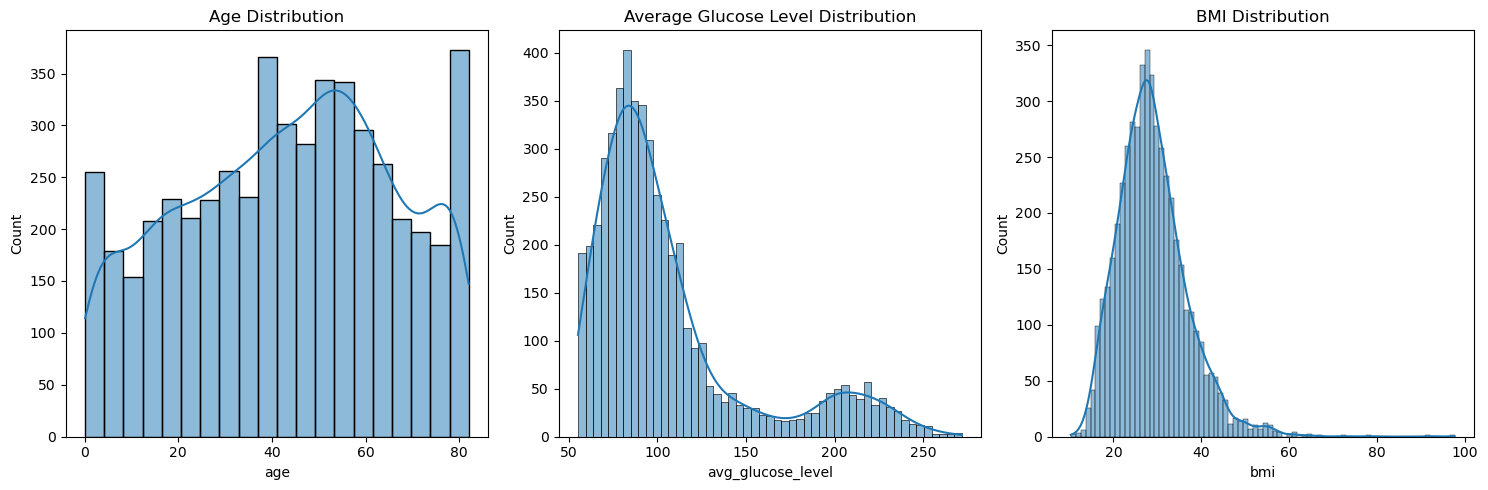

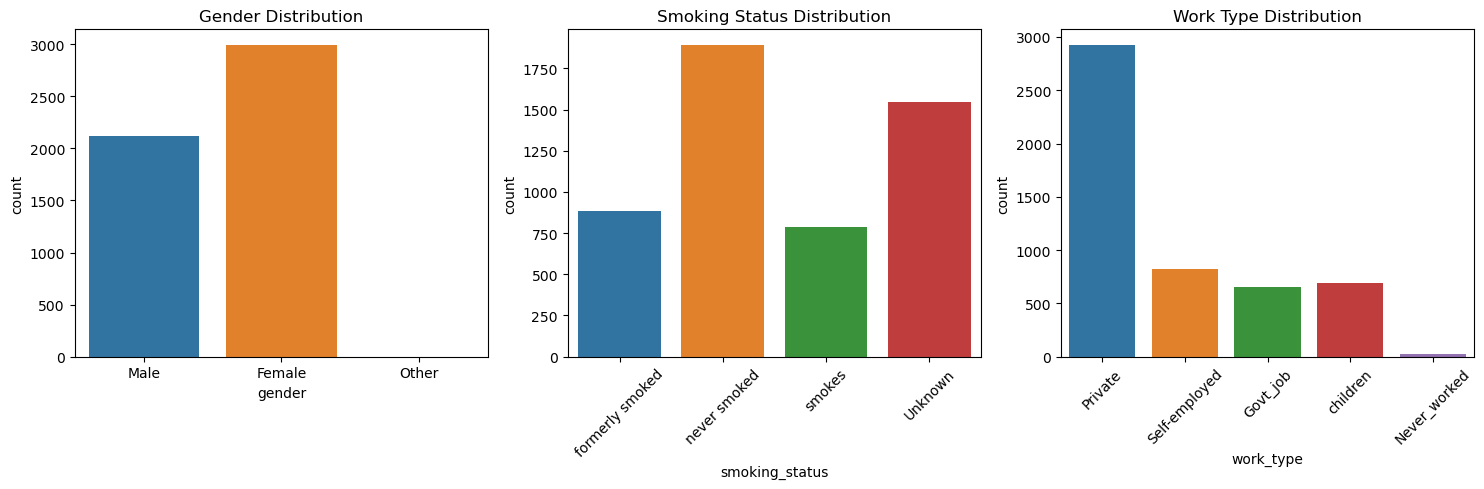

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset again to reset any previous filtering
healthcare_stroke_df = pd.read_csv(file_path)

# Histograms for numerical variables: 'age', 'avg_glucose_level', and 'bmi'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(healthcare_stroke_df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(healthcare_stroke_df['avg_glucose_level'], kde=True)
plt.title('Average Glucose Level Distribution')

plt.subplot(1, 3, 3)
sns.histplot(healthcare_stroke_df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

# Bar Charts for categorical variables: 'gender', 'smoking_status', and 'work_type'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=healthcare_stroke_df)
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='smoking_status', data=healthcare_stroke_df)
plt.xticks(rotation=45)
plt.title('Smoking Status Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='work_type', data=healthcare_stroke_df)
plt.xticks(rotation=45)
plt.title('Work Type Distribution')

plt.tight_layout()
plt.show()



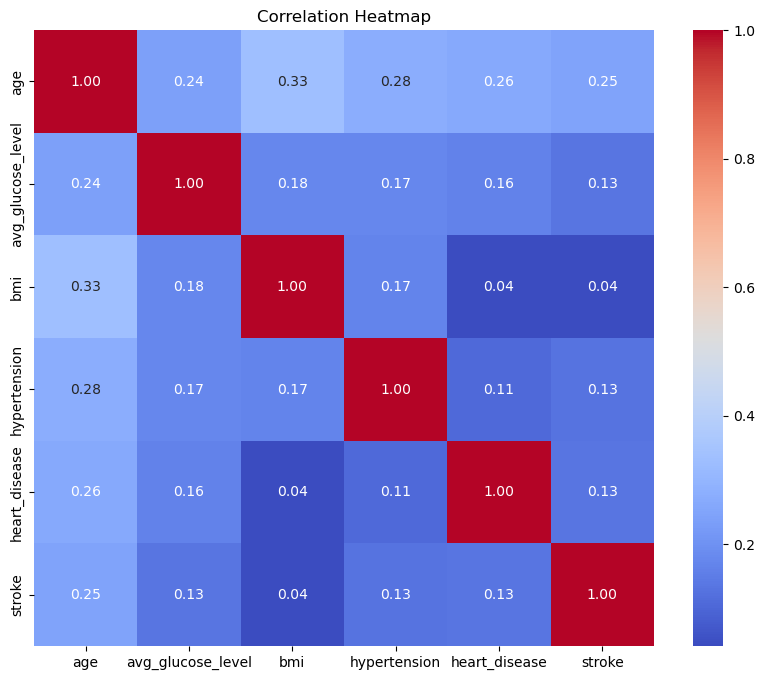

In [33]:
# Creating a correlation heatmap for the numerical variables
numerical_vars = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']

# Computing the correlation matrix
corr_matrix = healthcare_stroke_df[numerical_vars].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



In [ ]:
original_df.drop(index=3116, inplace=True)

original_df
Male=pd.get_dummies(original_df['gender'], dtype=int, drop_first=True)
original_df['Male']=Male
Ever_Married=pd.get_dummies(original_df['ever_married'],dtype=int,drop_first=True)
original_df['ever_married']=Ever_Married


original_df['work_type'].value_counts()
original_df['age'].loc[original_df['work_type']=='children'].min()
original_df['age'].loc[original_df['work_type']=='children'].max()
original_df['work_type'].value_counts()